In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


#  **Import libraries**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

# **Load the data**

In [3]:
train=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

# **Data preprocessing**

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

In [6]:
y=train['label']
x=train.drop('label',axis=1)

In [7]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y.head()


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [9]:
labels=y
y=pd.get_dummies(y) #one-hot encoding 
y.head()

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [10]:
x.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [11]:
x=x/255   #Normalising to [0,1] range as pixel intensities vary from 0-254
test=test/255 

In [12]:
x=x.values.reshape(-1,28,28,1)   #reshaping into 28x28x1 
test=test.values.reshape(-1,28,28,1)


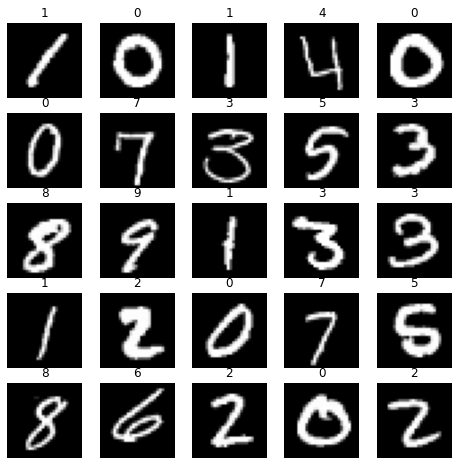

In [13]:
fig = plt.figure(figsize = (8,8))
for i in range(25):
    plt.subplot(5,5,i+1).set_title(labels[i])
    plt.imshow((x[i,:,:,:]),cmap='gray')
    plt.axis("off")
    
plt.show()


# **Train-test split**

In [14]:
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=0)

# **Creating the model**

In [15]:
model=tf.keras.Sequential()
model.add(layers.Conv2D(36,(3,3),padding='same',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(72,(3,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(108,(3,3),padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(layers.Dropout(0.2))


model.add(layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

In [16]:
model.compile(optimizer=keras.optimizers.SGD(lr=0.01),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 36)        360       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 36)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 72)        23400     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 72)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 72)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 108)         7

# **Training the model**

In [18]:
epochs = 25
history = model.fit(X_train,y_train,
  epochs=epochs, verbose = 2, #callbacks=[callbacks]
)

Epoch 1/25
1050/1050 - 8s - loss: 1.0082 - accuracy: 0.6716
Epoch 2/25
1050/1050 - 3s - loss: 0.2508 - accuracy: 0.9224
Epoch 3/25
1050/1050 - 3s - loss: 0.1623 - accuracy: 0.9500
Epoch 4/25
1050/1050 - 3s - loss: 0.1261 - accuracy: 0.9617
Epoch 5/25
1050/1050 - 4s - loss: 0.1077 - accuracy: 0.9667
Epoch 6/25
1050/1050 - 3s - loss: 0.0930 - accuracy: 0.9718
Epoch 7/25
1050/1050 - 3s - loss: 0.0856 - accuracy: 0.9724
Epoch 8/25
1050/1050 - 4s - loss: 0.0737 - accuracy: 0.9777
Epoch 9/25
1050/1050 - 4s - loss: 0.0698 - accuracy: 0.9782
Epoch 10/25
1050/1050 - 3s - loss: 0.0673 - accuracy: 0.9791
Epoch 11/25
1050/1050 - 4s - loss: 0.0612 - accuracy: 0.9805
Epoch 12/25
1050/1050 - 3s - loss: 0.0615 - accuracy: 0.9809
Epoch 13/25
1050/1050 - 3s - loss: 0.0549 - accuracy: 0.9824
Epoch 14/25
1050/1050 - 4s - loss: 0.0514 - accuracy: 0.9838
Epoch 15/25
1050/1050 - 3s - loss: 0.0515 - accuracy: 0.9838
Epoch 16/25
1050/1050 - 3s - loss: 0.0471 - accuracy: 0.9846
Epoch 17/25
1050/1050 - 3s - loss

<AxesSubplot:>

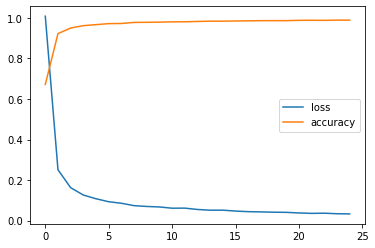

In [19]:
df = pd.DataFrame(history.history)
df.plot()

# **Evaluating the performance on validation set**

In [20]:
model.evaluate(X_val,y_val)

263/263 [==============================] - 1s 4ms/step - loss: 0.0386 - accuracy: 0.9882


[0.03864956274628639, 0.9882143139839172]

# **Prediction on test set**

In [21]:
predicted = model.predict(test)

In [22]:
predicted = np.argmax(predicted, axis =1)   #to get the number

In [23]:
predicted = pd.Series(predicted, name = "Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predicted],axis = 1)

submission.to_csv("mnist_submission.csv",index=False)
